In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in data
# Advance Retail Sales: Furniture and Home Furnishings Stores
furniture = pd.read_csv(r'C:\Users\ungdu\Downloads\furniture.csv')
print(furniture.head())

         DATE  MRTSSM442USN
0  1992-01-01          3846
1  1992-02-01          3908
2  1992-03-01          4157
3  1992-04-01          4141
4  1992-05-01          4275


In [3]:
# Rename columns for ease of reference
col_names = ['Month', 'Millions of Dollars']
furniture.columns = col_names
print(furniture.head())

        Month  Millions of Dollars
0  1992-01-01                 3846
1  1992-02-01                 3908
2  1992-03-01                 4157
3  1992-04-01                 4141
4  1992-05-01                 4275


In [4]:
# Check for any null values
print(furniture.isna().sum())

# Convert the Date column to datetime, notice data is in months
from datetime import datetime
furniture['Month'] = pd.to_datetime(furniture['Month'])

Month                  0
Millions of Dollars    0
dtype: int64


In [5]:
# Set index, use inplace=True
furniture.set_index('Month', inplace=True)
print(furniture.head())

# Obtain the descriptive (summary) statistics
print(furniture.describe())

            Millions of Dollars
Month                          
1992-01-01                 3846
1992-02-01                 3908
1992-03-01                 4157
1992-04-01                 4141
1992-05-01                 4275
       Millions of Dollars
count           331.000000
mean           7553.815710
std            1666.744055
min            3846.000000
25%            6484.500000
50%            7651.000000
75%            8794.500000
max           11297.000000


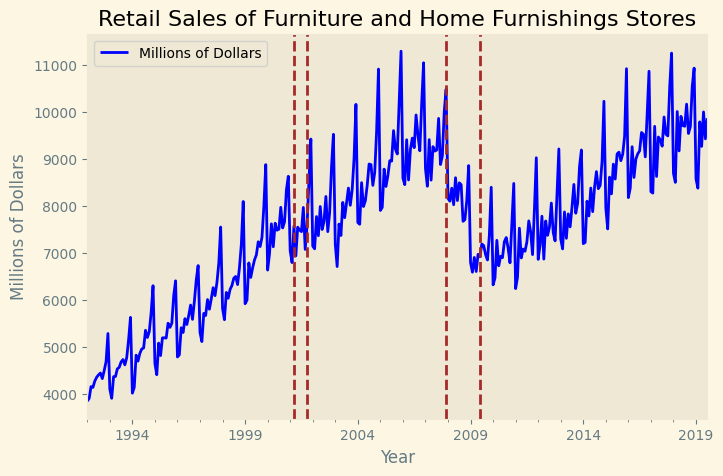

In [6]:
# Plot
plt.style.use('Solarize_Light2')
ax = furniture.plot(color='blue', grid=False, figsize=(8, 5))
ax.set_xlabel('Year')
ax.set_ylabel('Millions of Dollars')
ax.set_title('Retail Sales of Furniture and Home Furnishings Stores')
# Add a brown vertical line
ax.axvline('2001-03-01', color='brown', linestyle='--')
ax.axvline('2001-10-01', color='brown', linestyle='--')
ax.axvline('2007-12-01', color='brown', linestyle='--')
ax.axvline('2009-06-01', color='brown', linestyle='--')
plt.show()

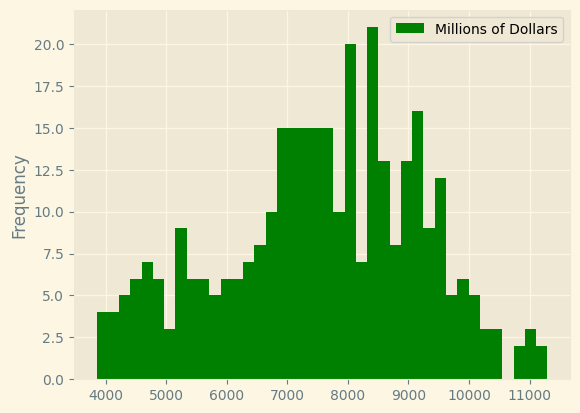

In [7]:
# Plot histogram (frequency of counts), change num of bins to see different plots
furniture.plot(kind='hist', bins=40, color='green', grid=True)
plt.show()

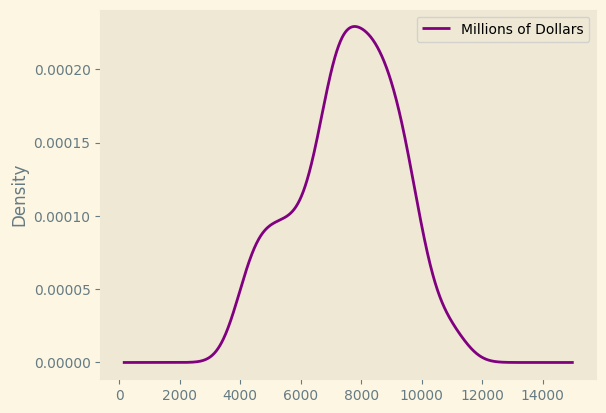

In [8]:
# Calculate kernel density plot
# A density plot shows the distribution of the data over a continuous interval.
# Kernel density plot smoothes out the noise in time series data.
# The peaks of a density plot help display where values are concentrated over the interval.
# A Kernel density plot is a better way to display the distribution because it's not affected by the number of bins used (each bar used in a typical histogram).
furniture.plot(kind='kde', color='purple', grid=False)
plt.show()

In [9]:
cpi = pd.read_csv(r'C:\Users\ungdu\Downloads\CPI.csv')
print(cpi.head())

     DATE  CPIAUCNS
0  1/1/92     138.1
1  2/1/92     138.6
2  3/1/92     139.3
3  4/1/92     139.5
4  5/1/92     139.7


In [10]:
print(cpi.tail())

       DATE  CPIAUCNS
326  3/1/19   254.202
327  4/1/19   255.548
328  5/1/19   256.092
329  6/1/19   256.143
330  7/1/19   256.571


In [13]:
# Use the correct column name for CPI
cpi_list = cpi['CPIAUCNS'].to_list()

In [14]:
# Create a new column in the dataframe
furniture['CPI'] = cpi_list
print(furniture.head())

            Millions of Dollars    CPI
Month                                 
1992-01-01                 3846  138.1
1992-02-01                 3908  138.6
1992-03-01                 4157  139.3
1992-04-01                 4141  139.5
1992-05-01                 4275  139.7


In [15]:
# We will use July 2019 (last value in series)
july2019_cpi = 256.571

In [16]:
# Calculate the CPI for all months from 1992 to 2019 by dividing by the July 2019 CPI value
furniture['CPI_July19_rate'] = furniture['CPI'] / july2019_cpi
print(furniture.head())

            Millions of Dollars    CPI  CPI_July19_rate
Month                                                  
1992-01-01                 3846  138.1         0.538253
1992-02-01                 3908  138.6         0.540201
1992-03-01                 4157  139.3         0.542930
1992-04-01                 4141  139.5         0.543709
1992-05-01                 4275  139.7         0.544489


In [17]:
# Calculate the furniture sales (millions of dollars) in terms of July 2019 dollars
furniture['furniture_price_adjusted'] = furniture['Millions of Dollars'] * furniture['CPI_July19_rate']
print(furniture.head(10))

            Millions of Dollars    CPI  CPI_July19_rate  \
Month                                                     
1992-01-01                 3846  138.1         0.538253   
1992-02-01                 3908  138.6         0.540201   
1992-03-01                 4157  139.3         0.542930   
1992-04-01                 4141  139.5         0.543709   
1992-05-01                 4275  139.7         0.544489   
1992-06-01                 4357  140.2         0.546437   
1992-07-01                 4407  140.5         0.547607   
1992-08-01                 4446  140.9         0.549166   
1992-09-01                 4328  141.3         0.550725   
1992-10-01                 4497  141.8         0.552674   

            furniture_price_adjusted  
Month                                 
1992-01-01               2070.119382  
1992-02-01               2111.106867  
1992-03-01               2256.958503  
1992-04-01               2251.499585  
1992-05-01               2327.689022  
1992-06-01        

In [18]:
# Create a new dataframe that specifies the column we want
furniture_adjusted = furniture[['furniture_price_adjusted']]
print(furniture_adjusted.head())

            furniture_price_adjusted
Month                               
1992-01-01               2070.119382
1992-02-01               2111.106867
1992-03-01               2256.958503
1992-04-01               2251.499585
1992-05-01               2327.689022


In [19]:
# Saving the dataframe, which has the sales adjusted to July 2019 prices
furniture_adjusted.to_csv('df_furniture.csv')